# OBJECTIVES

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- What is the overall sales trend?
- Which are the Top 10 products by sales?
- Which are the Most Selling Products?
- Which is the most preferred Ship Mode?
- Which are the Most Profitable Category and Sub-Category?
- Which countries have the highest profit?
- How does discount impact profit?

### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

### Data Audit

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [6]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


## EXPLORATORY DATA ANALYSIS

#### What is the overall sales trend?

In [8]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [9]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [10]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [11]:
df_trend = df.groupby('month_year')['sales'].sum().round(2).reset_index()
df_trend.head()

,month_year,sales
0,2011-01,98898.49
1,2011-02,91152.16
2,2011-03,145729.37
3,2011-04,116915.76
4,2011-05,146747.84


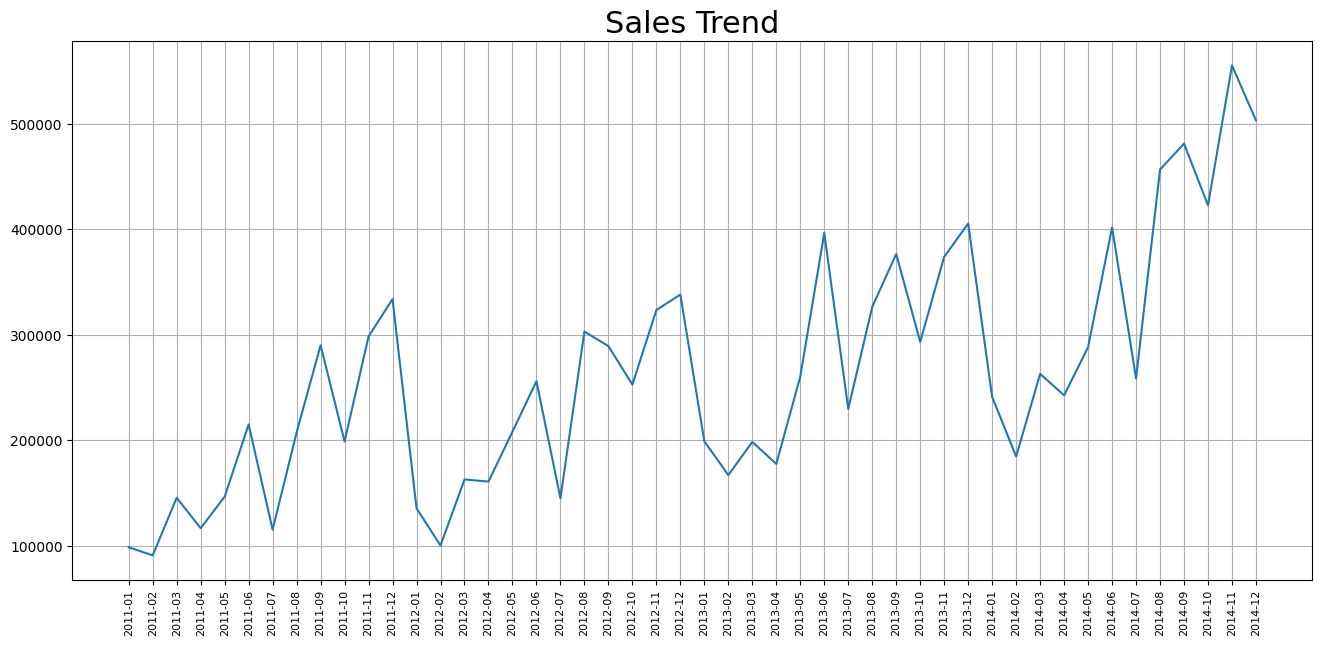

In [12]:
plt.figure(figsize=(16,7))
plt.plot(df_trend['month_year'], df_trend['sales'])
plt.xticks(rotation=90,size=8)
plt.grid(True)
plt.title('Sales Trend',size=22)
plt.show()

### Which are the Top 10 products by sales?

In [13]:
product_sales = pd.DataFrame(df.groupby('product_name')['sales'].sum().round(2))

In [14]:
product_sales = product_sales.sort_values('sales',ascending=False)

In [15]:
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.78
"Cisco Smart Phone, Full Size",76441.53
"Motorola Smart Phone, Full Size",73156.30
"Nokia Smart Phone, Full Size",71904.56
Canon imageCLASS 2200 Advanced Copier,61599.82
"Hon Executive Leather Armchair, Adjustable",58193.48
"Office Star Executive Leather Armchair, Adjustable",50661.68
"Harbour Creations Executive Leather Armchair, Adjustable",50121.52
"Samsung Smart Phone, Cordless",48653.46


### Which are the Most Selling Products?

In [47]:
most_sell_prod = pd.DataFrame(df.groupby('product_name')['quantity'].sum().reset_index())

In [51]:
most_sell_prod = most_sell_prod.sort_values('quantity',ascending=False)[:10]
most_sell_prod

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


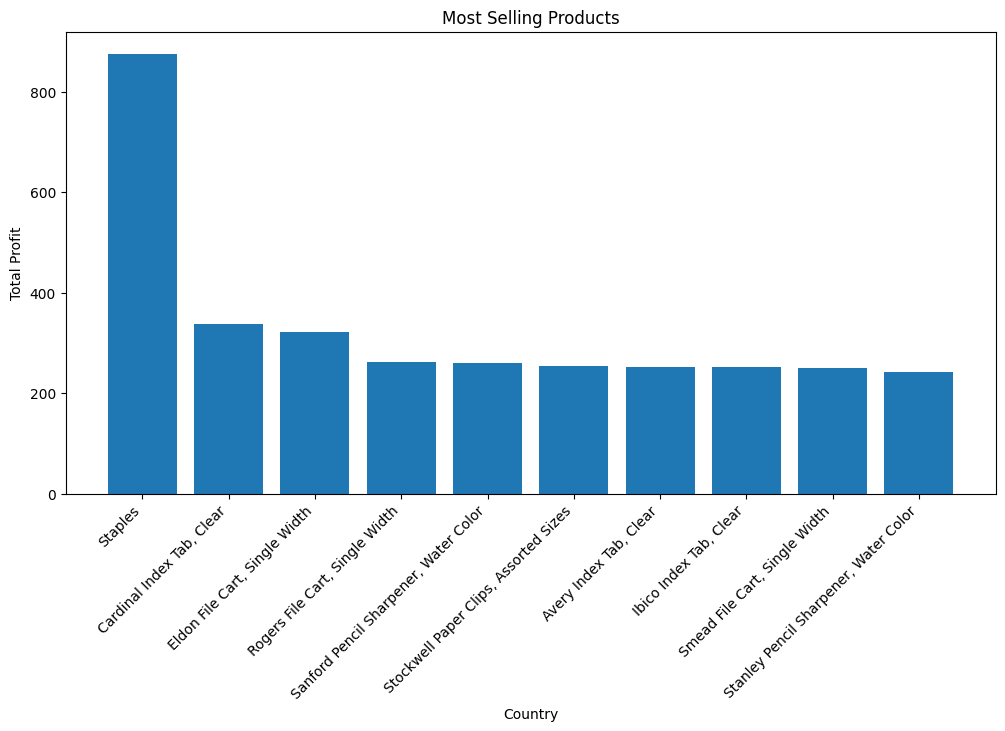

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(most_sell_prod['product_name'], most_sell_prod['quantity'])
plt.title('Most Selling Products')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

### Which is the most preferred Ship Mode?

<Axes: xlabel='ship_mode', ylabel='count'>

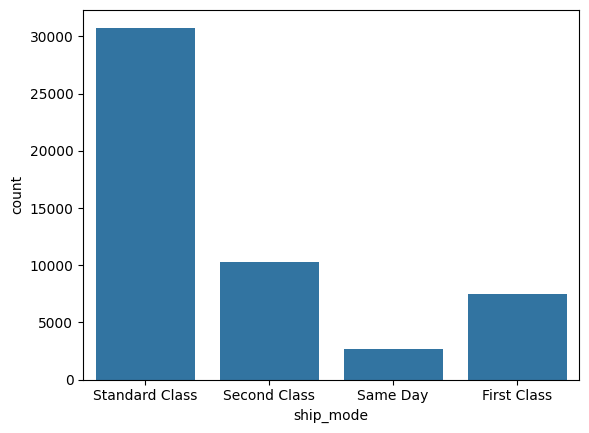

In [19]:
sns.countplot(x=df['ship_mode'])

### Which are the Most Profitable Category and Sub-Category?

### Profit by Category

In [82]:
profit_by_cat = pd.DataFrame(df.groupby('category')['profit'].sum().round(2).reset_index())
profit_by_cat

,category,profit
0,Furniture,286782.25
1,Office Supplies,518473.83
2,Technology,663778.73


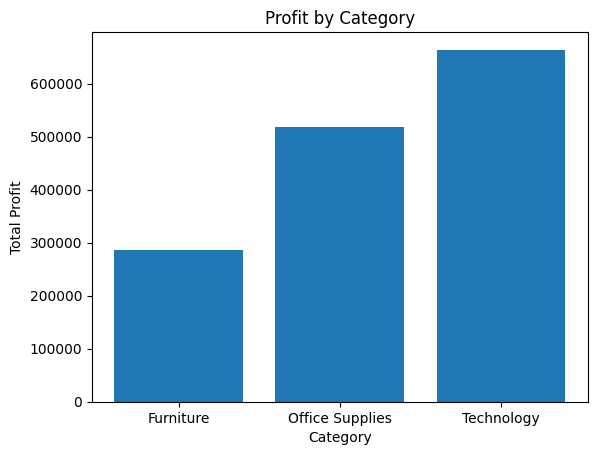

In [60]:
plt.bar(profit_by_cat['category'], profit_by_cat['profit'])
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

### Profit by Sub-Category

In [84]:
profit_sub_cat = pd.DataFrame(df.groupby('sub_category')['profit'].sum().round(2).reset_index())

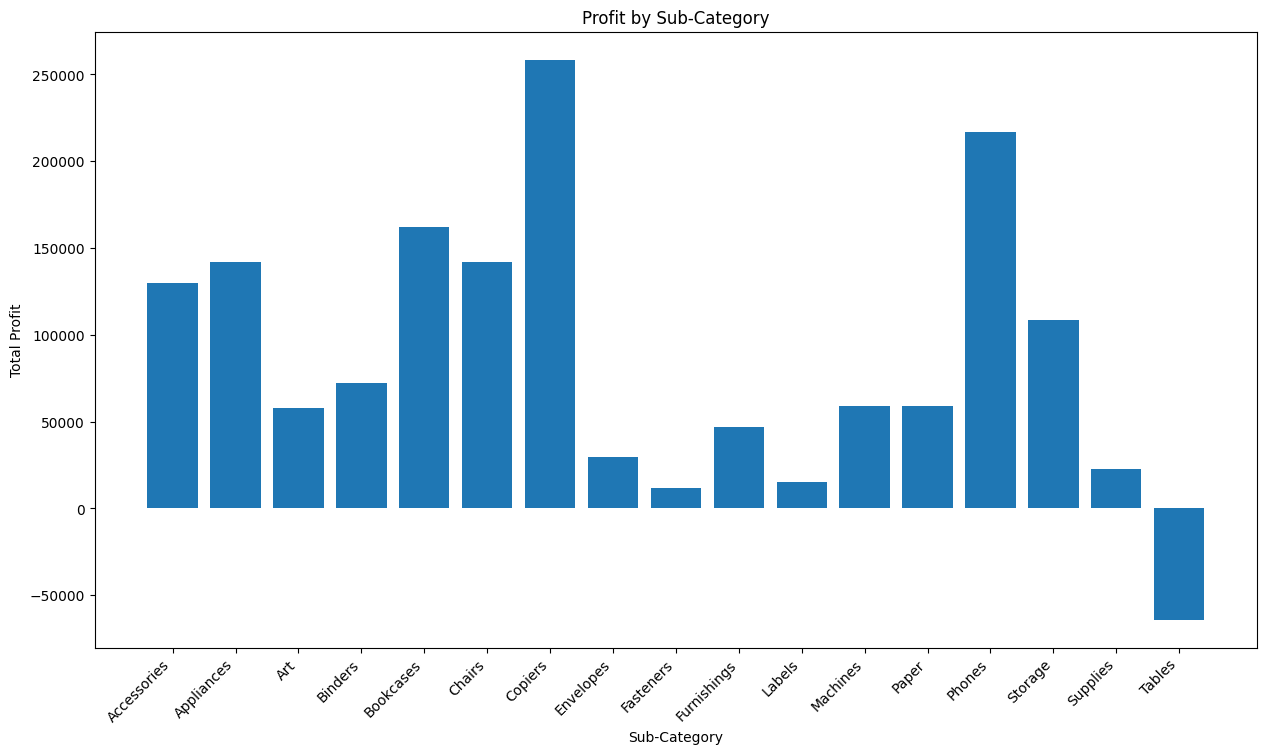

In [80]:
plt.figure(figsize=(15, 8))
plt.bar(profit_sub_cat['sub_category'], profit_sub_cat['profit'])
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45,ha='right')
plt.show()

### Profit by Category and Sub-Category

In [40]:
cat_subcat_profit = pd.DataFrame(df.groupby(['category','sub_category'])['profit'].sum().round(2).reset_index())

In [41]:
cat_subcat_profit = cat_subcat_profit.sort_values(['category', 'profit'],ascending=False)

In [52]:
cat_subcat_profit

,category,sub_category,profit
14,Technology,Copiers,258567.55
16,Technology,Phones,216717.01
13,Technology,Accessories,129626.31
15,Technology,Machines,58867.87
4,Office Supplies,Appliances,141680.59
11,Office Supplies,Storage,108461.49
6,Office Supplies,Binders,72449.85
10,Office Supplies,Paper,59207.68
5,Office Supplies,Art,57953.91
7,Office Supplies,Envelopes,29601.12


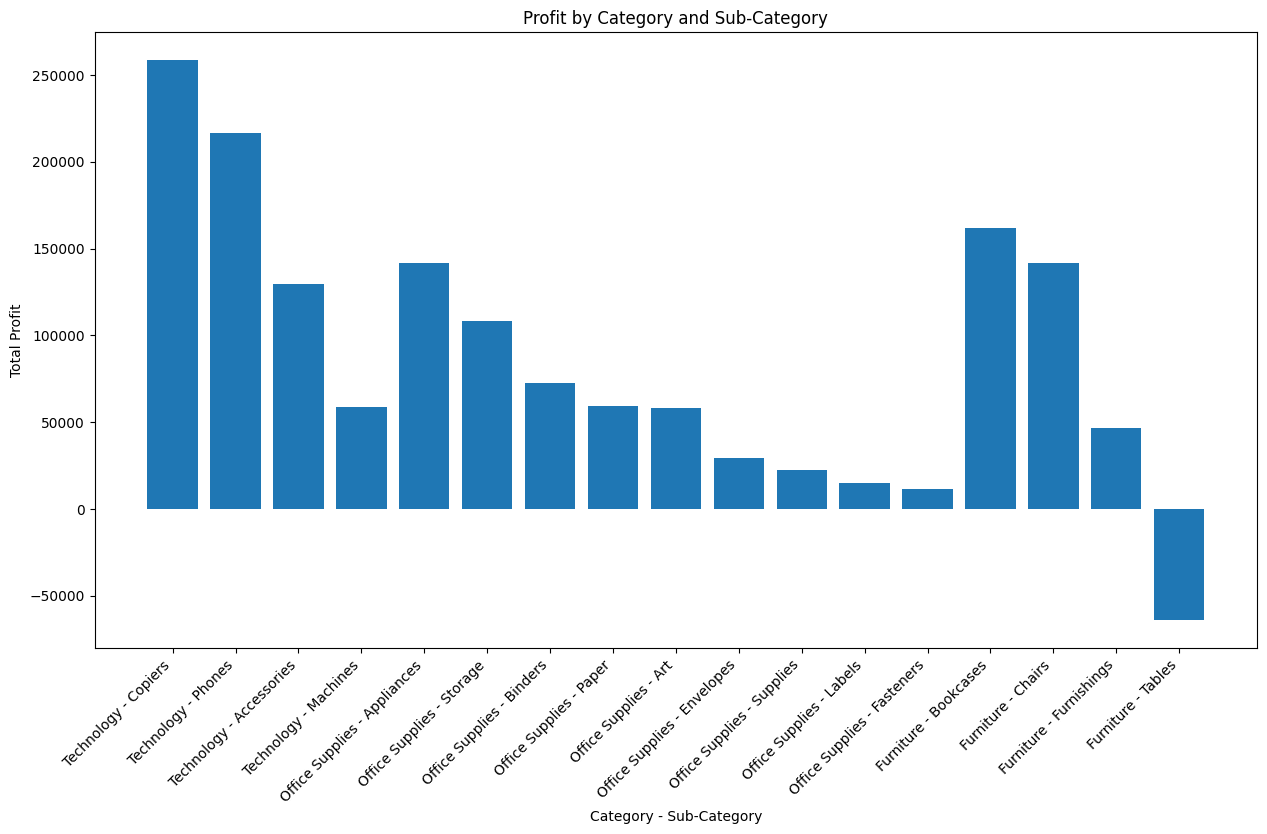

In [81]:
plt.figure(figsize=(15, 8))
plt.bar(cat_subcat_profit['category'] + ' - ' + cat_subcat_profit['sub_category'],cat_subcat_profit['profit'])
plt.title('Profit by Category and Sub-Category')
plt.xlabel('Category - Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

### Which countries have the highest profit?

In [30]:
state_country_profit = pd.DataFrame(df.groupby('country')['profit'].sum().round(2).reset_index())

In [33]:
state_country_profit = state_country_profit.sort_values('profit',ascending=False)[:10]

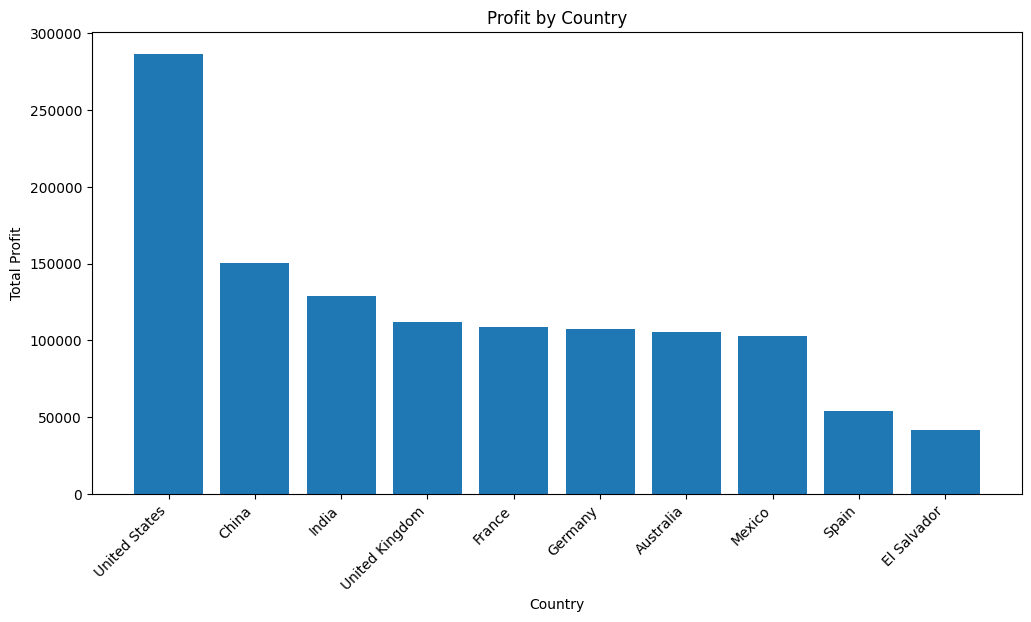

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(state_country_profit['country'], state_country_profit['profit'])
plt.title('Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

### How does discount impact profit?

In [26]:
discount_impact = pd.DataFrame(df.groupby('discount')['profit'].sum().round(2).reset_index())
discount_impact['discount'] = discount_impact['discount'] * 100

In [27]:
discount_impact.sort_values('profit',ascending=False)

,discount,profit
0,0.0,1770695.27
3,10.0,260641.71
7,20.0,117715.87
1,0.2,57976.58
6,17.0,28163.07
4,15.0,26096.56
2,7.0,21148.50
5,15.0,1279.35
9,25.0,800.59
8,20.2,-595.27


# CONCLUSION

<b>Seasonal Sales Patterns: </b>

The analysis indicates a consistent trend in which the highest sales are observed during the month of <u>December</u> each year. This suggests a potential seasonality or increased consumer activity, possibly influenced by holiday shopping trends.

<b>Top-Selling Product:</b>

The standout performer in terms of sales is the <u>Apple Smart Phone</u>, showcasing its popularity among customers. This information can be valuable for inventory management and marketing strategies, emphasizing the importance of maintaining a strong product lineup.

<b>Best-Selling Product by Quantity:</b>

<u>Staples</u> emerges as the most sold product when considering the quantity metric. This suggests a high demand for this particular item, which could be due to its practical utility or widespread applicability.

<b>Preferred Shipping Mode:</b>

The <u>Standard Class</u> shipping mode stands out as the most preferred choice. Understanding customer preferences for shipping modes is crucial for optimizing logistics and ensuring timely deliveries.

<b>Top-Performing Product Category:</b>

Within the Technology category, <u>Copiers</u> stands out with the highest number of sales. This insight can guide inventory allocation and marketing efforts to capitalize on the popularity of technology-related products.

<b>Profitable Region:</b>

The highest profits are accrued in the <u>USA</u>, indicating the significance of this market in contributing to the overall profitability. This insight can guide resource allocation and expansion strategies, emphasizing the importance of the U.S. market.

<b>Impact of Discounts on Profitability:</b>
The analysis highlights an interesting relationship between discounts and profitability. Products with no discounts tend to yield the highest profits, while those with discounts exceeding 30% show a tendency to incur losses. This suggests the need for a strategic approach to discounting to ensure a balance between attracting customers and maintaining profitability.

In summary, these insights provide a comprehensive understanding of sales patterns, popular products, shipping preferences, and regional profitability. Leveraging this information can empower decision-makers to optimize business strategies, inventory management, and customer satisfaction.